In [ ]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [ ]:
#Load the data set
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()

#check the data type
print(type(cancer_data))

<class 'sklearn.utils.Bunch'>


In [ ]:
#Convert it to pandas data frame for ease of use
import pandas as pd
cancer_df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
cancer_df['target'] = pd.Series(cancer_data.target)
print(cancer_df.head())


   mean radius  mean texture  ...  worst fractal dimension  target
0        17.99         10.38  ...                  0.11890       0
1        20.57         17.77  ...                  0.08902       0
2        19.69         21.25  ...                  0.08758       0
3        11.42         20.38  ...                  0.17300       0
4        20.29         14.34  ...                  0.07678       0

[5 rows x 31 columns]


In [ ]:
#check out the head to understand the data
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
#understand the dimension and the data types
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
#get the shape elements
N, D = cancer_df.shape

In [ ]:
#split the data set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer_df.drop(['target'],axis=1), cancer_df['target'], test_size=0.3, random_state=23)

#check the split
y_train.head()

326    1
13     0
38     0
135    0
492    0
Name: target, dtype: int64

In [ ]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
326,14.11,12.88,90.03,616.5,0.09309,0.05306,0.01765,0.02733,0.1373,0.05700,0.2571,1.081,1.558,23.92,0.006692,0.01132,0.005717,0.006627,0.014160,0.002476,15.53,18.00,98.40,749.9,0.12810,0.11090,0.05307,0.05890,0.2100,0.07083
13,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,0.05338,0.4033,1.078,2.903,36.58,0.009769,0.03126,0.050510,0.019920,0.029810,0.003002,16.84,27.66,112.00,876.5,0.11310,0.19240,0.23220,0.11190,0.2809,0.06287
38,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504,1.2140,2.188,8.077,106.00,0.006883,0.01094,0.018180,0.019170,0.007882,0.001754,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504
135,12.77,22.47,81.72,506.3,0.09055,0.05761,0.04711,0.02704,0.1585,0.06065,0.2367,1.380,1.457,19.87,0.007499,0.01202,0.023320,0.008920,0.016470,0.002629,14.49,33.37,92.04,653.6,0.14190,0.15230,0.21770,0.09331,0.2829,0.08067
492,18.01,20.56,118.40,1007.0,0.10010,0.12890,0.11700,0.07762,0.2116,0.06077,0.7548,1.288,5.353,89.74,0.007997,0.02700,0.037370,0.016480,0.028970,0.003996,21.53,26.06,143.40,1426.0,0.13090,0.23270,0.25440,0.14890,0.3251,0.07625


In [ ]:
#normalize the data so that there no extreme values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[-0.54349129, -0.35505978, -0.57600826, ..., -0.5060577 ,
         0.37102351, -0.16940445],
       [ 0.10402502,  1.22422818,  0.16749935, ...,  0.09167617,
         0.49156031,  0.94550795],
       [ 2.67658983,  1.60056914,  2.84183771, ...,  2.4707784 ,
         0.50947795,  0.16538812],
       ...,
       [ 0.21777789, -0.57907225,  0.12850123, ..., -0.5434258 ,
        -0.58675541, -0.86290335],
       [ 0.3927823 , -1.71033526,  0.45108349, ...,  1.0601327 ,
         0.53879771,  0.87642377],
       [ 0.25569551,  0.57907225,  0.24040887, ...,  0.25204759,
         0.4524673 ,  0.42525092]])

In [ ]:
# Create the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(D-1,))) #D-1 because our initial data set shape had target column as part of the dataset
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#fit or train the model
log_regression = model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=75)

Epoch 1/75
13/13 [==============================] - 0s 18ms/step - loss: 63.3061 - accuracy: 0.3744 - val_loss: 56.9088 - val_accuracy: 0.3684
Epoch 2/75
13/13 [==============================] - 0s 8ms/step - loss: 52.7148 - accuracy: 0.3744 - val_loss: 46.8200 - val_accuracy: 0.3684
Epoch 3/75
13/13 [==============================] - 0s 7ms/step - loss: 42.4391 - accuracy: 0.3744 - val_loss: 36.4969 - val_accuracy: 0.3684
Epoch 4/75
13/13 [==============================] - 0s 7ms/step - loss: 32.0320 - accuracy: 0.3744 - val_loss: 26.1708 - val_accuracy: 0.3684
Epoch 5/75
13/13 [==============================] - 0s 7ms/step - loss: 21.6574 - accuracy: 0.3744 - val_loss: 15.9713 - val_accuracy: 0.3860
Epoch 6/75
13/13 [==============================] - 0s 8ms/step - loss: 11.3369 - accuracy: 0.4020 - val_loss: 6.4501 - val_accuracy: 0.4854
Epoch 7/75
13/13 [==============================] - 0s 8ms/step - loss: 3.0247 - accuracy: 0.6633 - val_loss: 0.9368 - val_accuracy: 0.8129
Epoch 8/

In [ ]:
#evaluate the model
print("Train score : ", model.evaluate(X_train, y_train))
print("Test score : ", model.evaluate(X_test, y_test))

13/13 [==============================] - 0s 1ms/step - loss: 0.4805 - accuracy: 0.9020
Train score :  [0.4805312156677246, 0.9020100235939026]
6/6 [==============================] - 0s 1ms/step - loss: 0.6172 - accuracy: 0.9006
Test score :  [0.6172025799751282, 0.9005848169326782]


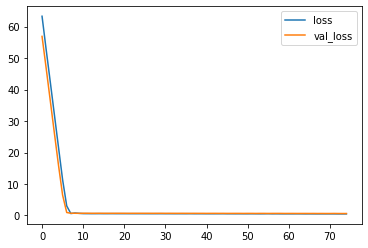

In [ ]:
#plot the loss data during training
import matplotlib.pyplot as plt
plt.plot(log_regression.history['loss'], label='loss')
plt.plot(log_regression.history['val_loss'], label='val_loss')
plt.legend()

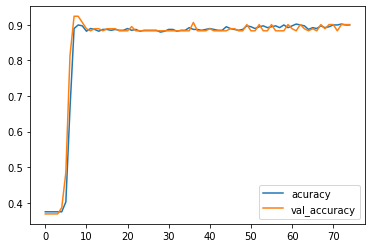

In [ ]:
plt.plot(log_regression.history['accuracy'], label='acuracy')
plt.plot(log_regression.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [ ]:
#predict any data using the model
y_predict = model.predict(X_test)
y_predict

array([[9.99542415e-01],
       [9.97800767e-01],
       [1.18018608e-08],
       [9.54926670e-01],
       [1.17889129e-10],
       [3.52418761e-10],
       [9.80058084e-35],
       [9.99926209e-01],
       [9.97431517e-01],
       [3.22193778e-15],
       [0.00000000e+00],
       [1.00000000e+00],
       [1.93683535e-01],
       [9.99945879e-01],
       [9.99104738e-01],
       [9.97077346e-01],
       [8.86989236e-01],
       [9.99987364e-01],
       [2.19779173e-22],
       [9.78000522e-01],
       [9.99958813e-01],
       [9.01588678e-01],
       [3.01778400e-15],
       [9.99698639e-01],
       [9.99997139e-01],
       [5.04105687e-01],
       [9.99960780e-01],
       [9.99873400e-01],
       [6.04279160e-01],
       [2.63243914e-04],
       [1.47193670e-04],
       [7.58945617e-08],
       [3.82365025e-38],
       [9.99999523e-01],
       [9.94980693e-01],
       [9.99859333e-01],
       [9.99952435e-01],
       [9.75880623e-01],
       [7.56543219e-01],
       [9.99997675e-01],


In [ ]:
#calculate accuracy manually
import numpy as np
y_predict.shape

(171, 1)

In [ ]:
y_predict_vector = np.round(y_predict).flatten()
y_predict_vector.shape

(171,)

In [ ]:
print("Accuracy is : ", np.mean(y_predict_vector == y_test))

Accuracy is :  0.9005847953216374


In [ ]:
#show classification report from sklearn
from sklearn import metrics

print(metrics.classification_report(y_test, y_predict_vector, target_names=cancer_data.target_names))

              precision    recall  f1-score   support

   malignant       0.86      0.87      0.87        63
      benign       0.93      0.92      0.92       108

    accuracy                           0.90       171
   macro avg       0.89      0.89      0.89       171
weighted avg       0.90      0.90      0.90       171



In [ ]:
#save the data
model.save('log_regression_linear.mod')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: log_regression_linear.mod/assets


In [ ]:
!ls


log_regression_linear.mod  sample_data


In [ ]:
#load data and check if it works
new_model = tf.keras.models.load_model('log_regression_linear.mod')
print(new_model.layers)
new_model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.6172 - accuracy: 0.9006


[0.6172025799751282, 0.9005848169326782]

In [ ]:
from google.colab import files
files.download('log_regression_linear.mod')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>